<a href="https://colab.research.google.com/github/willianszwy/Aprendizado-Supervisionado-no-Neuronio-Perceptron/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import random
import seaborn as sns
import statistics as stt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from prettytable import PrettyTable

# Parte I - Resolvendo um problema linearmente separável

Clonando o repositório do github que contém o data

In [64]:
# Descomentar essa linha se der erro
!git clone https://github.com/jesusdourado/rna-atividade2.1-data.git

fatal: destination path 'rna-atividade2.1-data' already exists and is not an empty directory.


In [65]:
exemplos = np.fromfile('rna-atividade2.1-data/data/dataAll.txt').reshape(-1,3)

In [66]:
random.seed(dt.datetime.now().time())

## Implementando o neurônio Perceptron de Rosenblatt

In [67]:
class Perceptron:

    def __init__(self, tamanho, bias = 0, taxa_aprendizado = 0.1, min_peso = -0.5, max_peso = 0.5) -> None:
        self.bias = bias
        self.taxa_aprendizado = taxa_aprendizado
        self.pesos = np.zeros(tamanho + 1)
        self.pesos[0] = random.uniform(min_peso, max_peso)
        self.pesos[1] = random.uniform(min_peso, max_peso)
        self.pesos[2] = random.uniform(min_peso, max_peso)
        self.entradas = np.empty(tamanho + 1)
        self.entradas[0] = self.bias
        self.erro = 0
        self.atualiza_pesos_contador = 0 

    def treinar_limitado_epoca(self, d, qtd_epocas = 100):
      print("Vetor de pesos iniciais: ")
      print(self.pesos)
      tamanho_dados = len(d)
      epoca = 0
      continua = True
      while continua and epoca < qtd_epocas:
        if epoca > 0:
          d = np.random.permutation(d)
        epoca += 1
        contem_erro = False
        qtd_ajustes_pesos_epoca = 0

        for i in range(d.shape[0]):
          
          self.entradas[1] = d[i][0]
          self.entradas[2] = d[i][1]

          y = self.predicao()
          self.calcula_erro(y, d[i][2])

          if self.erro != 0:
            qtd_ajustes_pesos_epoca += 1
            self.atualiza_pesos()
            contem_erro = True

        if not contem_erro:
          continua = True

      self.mostrar_relatorio_treino(epoca)

    def treinar(self, d):
        #print("Pesos iniciais: ", self.pesos)
        epoca = 0
        continua = True
        while continua:
            epoca += 1
            #print("Época: ", epoca)
            contem_erro = False
            qtd_ajustes_pesos_epoca = 0

            for i in range(d.shape[0]):

                self.entradas[1] = d[i][0]
                self.entradas[2] = d[i][1]

                y = self.predicao()
                self.calcula_erro(y, d[i][2])

                if self.erro != 0:
                    self.atualiza_pesos()
                    #print("pesos atualizados: ",self.pesos)
                    qtd_ajustes_pesos_epoca += 1
                    contem_erro = True      

            #print("Total ajustes de pesos da época: ", qtd_ajustes_pesos_epoca)

            if not contem_erro:
                continua = False
        return self.mostrar_relatorio_treino(epoca)

    def mostrar_relatorio_treino(self, num_epocas):
      print("\n","="*6, "RELATÓRIO DO TREINO", "="*6)
      print("Número total de ajustes dos pesos: ", self.atualiza_pesos_contador)
      print("Número de Épocas: ", num_epocas)
      print("Pesos finais: ", self.pesos)

      return [self.atualiza_pesos_contador, num_epocas]

    def teste(self, prever_classe):
      lista_predicao = []
      for registro in prever_classe:
        self.entradas[1] = registro[0]
        self.entradas[2] = registro[1]

        y = self.predicao()
        lista_predicao.append(y)
      return lista_predicao

    def funcao_de_ativacao(self, x):
        return 1 if x >= 0 else 0

    def predicao(self):
        y = self.pesos.T.dot(self.entradas)
        return self.funcao_de_ativacao(y)

    def calcula_erro(self,y, yd):
        self.erro = yd - y

    def delta(self):
        return self.taxa_aprendizado * self.erro * self.entradas

    def atualiza_pesos(self):
            self.pesos =  self.pesos + self.delta()
            self.atualiza_pesos_contador += 1

    def plot_data(self,X, scala_min = -1000, scala_max = 1000):
        plt.figure(figsize=(10,6))
        plt.xlabel("x1")
        plt.ylabel("x2")
        plt.title("Neurônio Perceptron")
        plt.grid(True)

        for i in range(X.shape[0]):
            plt.plot(X[i][0],X[i][1],'b.' if (X[i][2] == 1) else 'r.')

        x1 = np.array([np.amax(X), np.amin(X)])
        m = -self.pesos[1]/self.pesos[2]
        c = -self.pesos[0]/self.pesos[2]
        x2 = m*x1 + c
    
        plt.plot(x1, x2, 'k-',linewidth=2)

In [68]:
neuronio = Perceptron(2)
neuronio.treinar(exemplos)


 ====== RELATÓRIO DO TREINO ======
Número total de ajustes dos pesos:  12
Número de Épocas:  2
Pesos finais:  [-5.97276142e-02  1.51310471e+02 -1.50758354e+02]


[12, 2]

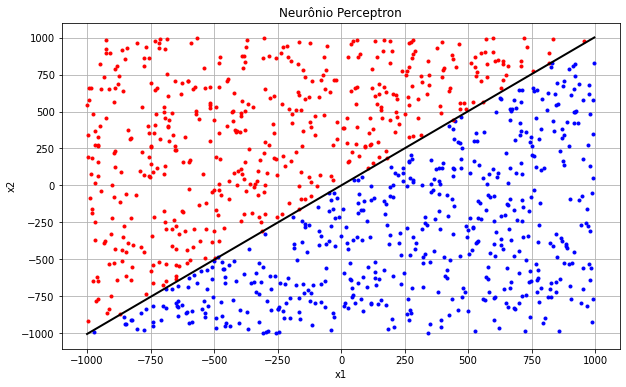

In [69]:
neuronio.plot_data(exemplos)

# Parte II - Experimentação

Calculando o identificador para ler o data**X**.txt

In [70]:
def caminhoDados ():
  matriculas = [1715080108, 1815310070, 1515080172, 1815310027]
  soma = 0

  for m in matriculas:
    soma += m % 10

  x = soma % 4
  print('Identificador: ' + str(x))

  return 'rna-atividade2.1-data/data/data' + str(x) + '.txt'

In [71]:
exemplos = np.fromfile(caminhoDados()).reshape(-1, 3)

Identificador: 1


Realizando o treino para 6 combinações possíveis e plotando o gráfico para a última das repetições.

In [72]:
valores_n = [0.4, 0.1, 0.01]
valores_I = [100, 0.5]

Treinando para n = 0.4, I no intervalo [-100, +100]

 ====== RELATÓRIO DO TREINO ======
Número total de ajustes dos pesos:  406
Número de Épocas:  15
Pesos finais:  [-31.05989493  24.40378331  13.76935357]

 ====== RELATÓRIO DO TREINO ======
Número total de ajustes dos pesos:  49
Número de Épocas:  4
Pesos finais:  [-56.64246395  31.54510614  36.99318794]

 ====== RELATÓRIO DO TREINO ======
Número total de ajustes dos pesos:  199
Número de Épocas:  17
Pesos finais:  [-20.32219849  11.27583887  13.77344293]

 ====== RELATÓRIO DO TREINO ======
Número total de ajustes dos pesos:  739
Número de Épocas:  39
Pesos finais:  [-59.92727929  31.22550503  41.10978879]

 ====== RELATÓRIO DO TREINO ======
Número total de ajustes dos pesos:  23
Número de Épocas:  4
Pesos finais:  [-66.5973265   49.8533034   42.01490124]

 ====== RELATÓRIO DO TREINO ======
Número total de ajustes dos pesos:  70
Número de Épocas:  10
Pesos finais:  [-75.88308226  52.4921227   50.01301187]

 ====== RELATÓRIO DO TREINO 

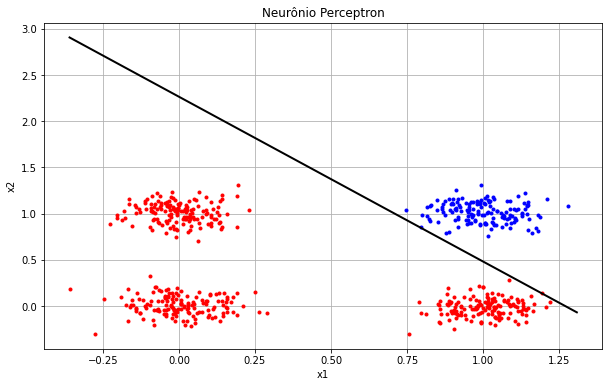

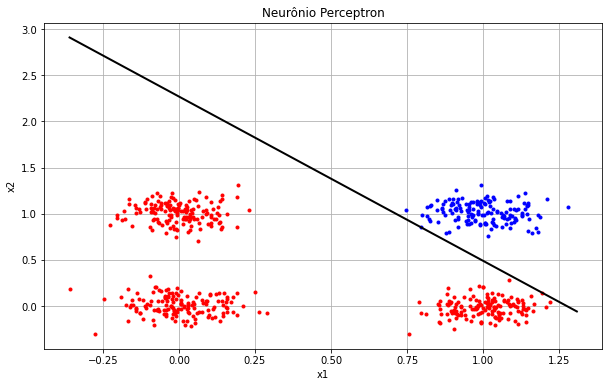

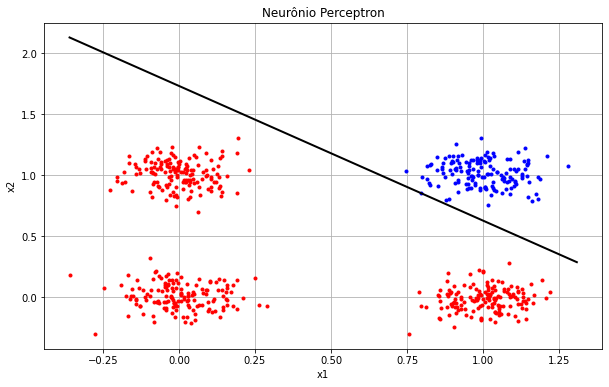

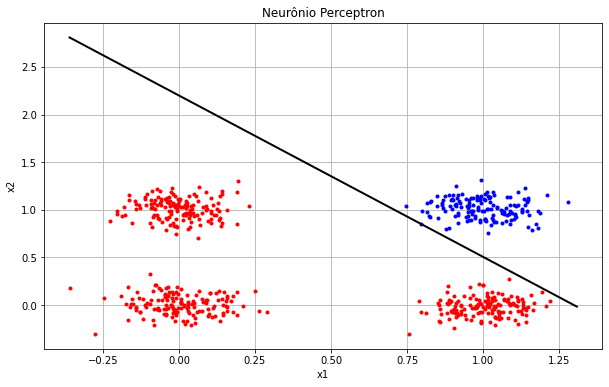

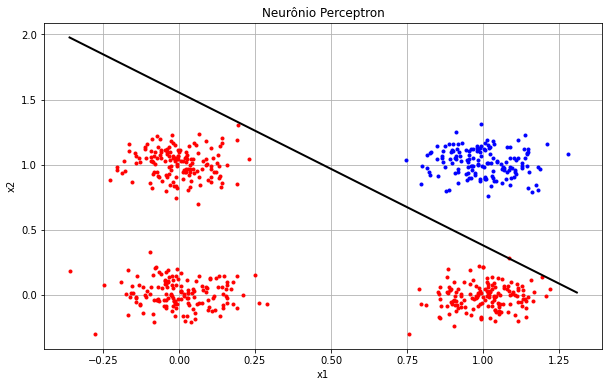

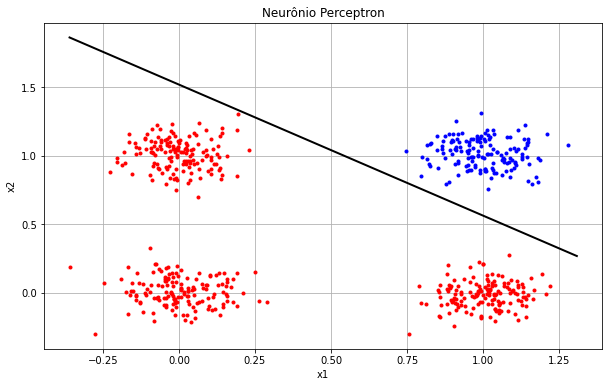

In [73]:
table = PrettyTable(['Taxa de aprendizado', 'Intervalo de pesos', 'Quantidade de ajustes', 'Menor nº de épocas para convergência'])

for I in valores_I:
  for n in valores_n:
    print('Treinando para n = ' + str(n) + ', I no intervalo [-' + str(I) + ', +' + str(I) + ']')
    
    menos_epocas = 100000
    qnt_treino = []

    for _ in range(10):
      neuronio = Perceptron(2, 1, n, -1 * I, I)
      stats = neuronio.treinar(exemplos)

      qnt_treino.append(stats[0])

      if(stats[1] < menos_epocas) :
          menos_epocas = stats[1]
    neuronio.plot_data(exemplos, -1, 1)
    table.add_row(['n=' + str(n), '(-' + str(I) + ', +' + str(I) + ')', str(stt.mean(qnt_treino)) + ' +- ' + str(stt.stdev(qnt_treino)), str(menos_epocas)])

In [74]:
print(table)

+---------------------+--------------------+-----------------------------+--------------------------------------+
| Taxa de aprendizado | Intervalo de pesos |    Quantidade de ajustes    | Menor nº de épocas para convergência |
+---------------------+--------------------+-----------------------------+--------------------------------------+
|        n=0.4        |    (-100, +100)    | 279.5 +- 233.66607227694254 |                  4                   |
|        n=0.1        |    (-100, +100)    | 1440.5 +- 805.2532037950685 |                  13                  |
|        n=0.01       |    (-100, +100)    | 11480.4 +- 9732.23924444478 |                  59                  |
|        n=0.4        |    (-0.5, +0.5)    |  47.1 +- 17.123408279636127 |                  10                  |
|        n=0.1        |    (-0.5, +0.5)    |   31 +- 13.021349989749739  |                  5                   |
|        n=0.01       |    (-0.5, +0.5)    |   64 +- 39.20600860979234   |              

Analisando o intervalo maior = **[-100, +100]**, nota-se que, para a convergência, valores maiores para taxa de aprendizado são mais eficientes **(0.4 foi o melhor)** em detrimento das taxas menores **(0.01 foi o pior)**. Situação essa explicada pelo fato dos pesos serem muito altos e o ajuste para a convergência precisar ser maior também.


Analisando o intervalo menor = **[-0.5, +0.5]**, a conclusão é inversa: para uma taxa de aprendizado menor, o treino foi mais eficiente; para uma taxa maior, o treino foi mais demorado, ou seja, necessitou-se de mais épocas para a maioria dos treinos que a equipe realizou. A razão para essa situação segue o mesmo raciocínio anterior: como os pesos são pequenos - a mesma ordem de grandeza que a taxa de aprendizado praticamente -, o ajuste precisa ser mais suave quando for necessário ajustá-los.

Por fim, o intervalo de pesos mais interessante para essa base de dados ser treinada com certeza é **[-0.5, +0.5]** com a taxa de aprendizado de **0.01**.

# Parte III - Validação *Holdout* em problema não linearmente separável

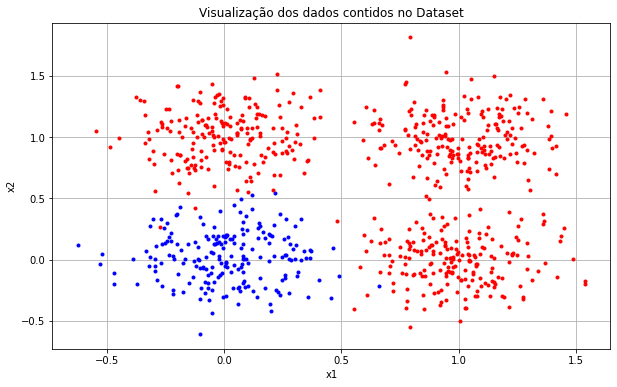

In [75]:
exemplos_holdout = np.fromfile("rna-atividade2.1-data/data/dataHoldout.txt").reshape(-1, 3)


plt.figure(figsize=(10,6))
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Visualização dos dados contidos no Dataset")
plt.grid(True)

for i in range(exemplos_holdout.shape[0]):
    plt.plot(exemplos_holdout[i][0], exemplos_holdout[i][1], 'b.' if (exemplos_holdout[i][2] == 1) else 'r.')

plt.show()

Conforme os dados estão distrubídos no gráfico acima, podemos inferir que o problema não é linearmente sepável visto que não conseguimos gerar um hiperplano, ou seja, não conseguimos serparar através de uma reta. Sabendo disso, utilizaremos o perceptron para treinar até 100 épocas, para ver como o algoritmo irá se sair. 

In [76]:
tamanho_dataset = exemplos_holdout.shape[0]
tamanho_treino = int(tamanho_dataset * 0.7)

exemplos_aleatorios = np.random.permutation(exemplos_holdout)

exemplos_treino = exemplos_aleatorios[:tamanho_treino]
exemplos_teste = exemplos_aleatorios[tamanho_treino:]


df_treino = pd.DataFrame(exemplos_treino)
qtd_classe_treino = df_treino.groupby(2).size()

df_teste = pd.DataFrame(exemplos_teste)
qtd_classe_teste = df_teste.groupby(2).size()

print("Parecer dos dados de treino e teste:")
print("-"*30)
print("Treino")
print("Classe 0: ", qtd_classe_treino[0])
print("Classe 1: ", qtd_classe_treino[1])
print("Total de exemplos: ", df_treino.shape[0])
print("-"*30)
print("Teste")
print("Classe 0: ", qtd_classe_teste[0])
print("Classe 1: ", qtd_classe_teste[1])
print("Total de exemplos: ", df_teste.shape[0])

Parecer dos dados de treino e teste:
------------------------------
Treino
Classe 0:  425
Classe 1:  135
Total de exemplos:  560
------------------------------
Teste
Classe 0:  175
Classe 1:  65
Total de exemplos:  240


Abaixo, é exibido como os dados estão dispersos: 

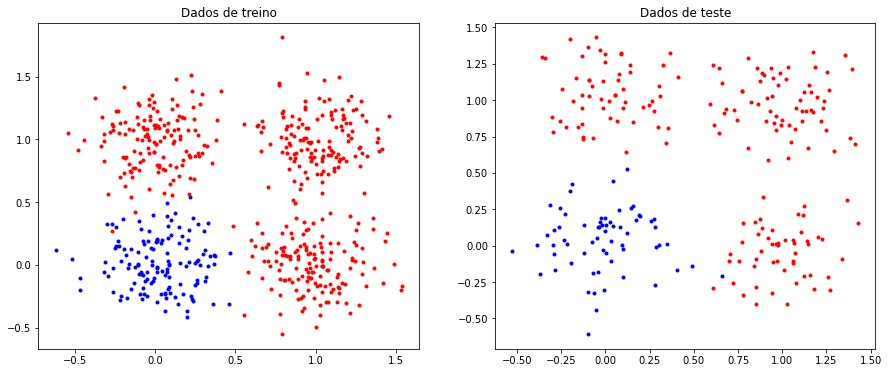

In [77]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,6))

for i in range(exemplos_treino.shape[0]):
    ax1.plot(exemplos_treino[i][0], exemplos_treino[i][1], 'b.' if (exemplos_treino[i][2] == 1) else 'r.')

ax1.set_title("Dados de treino");

for i in range(exemplos_teste.shape[0]):
    ax2.plot(exemplos_teste[i][0], exemplos_teste[i][1], 'b.' if (exemplos_teste[i][2] == 1) else 'r.')

ax2.set_title("Dados de teste");

In [85]:
neuronio = Perceptron(tamanho = 2, bias = 1, taxa_aprendizado = 0.1, min_peso = -0.5, max_peso = 0.5)
neuronio.treinar_limitado_epoca(exemplos_treino)

Vetor de pesos iniciais: 
[-0.34138175  0.01976254 -0.15880603]

 ====== RELATÓRIO DO TREINO ======
Número total de ajustes dos pesos:  3349
Número de Épocas:  100
Pesos finais:  [ 0.15861825 -0.39400583 -0.57711104]


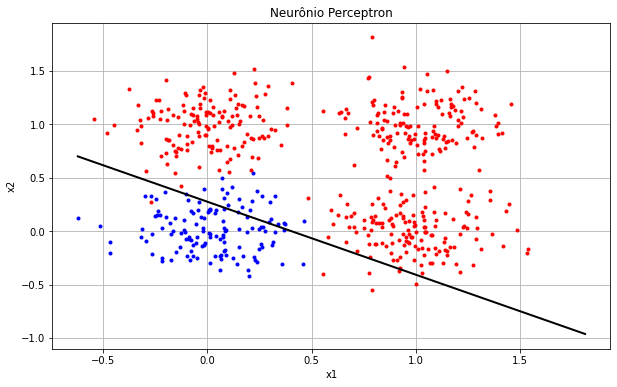

In [86]:
neuronio.plot_data(exemplos_treino, scala_min= -0.6, scala_max=1.6)

In [87]:
exemplos_teste_x = exemplos_teste[:,:2]
exemplos_teste_y = exemplos_teste[:,2]

predicao_teste = neuronio.teste(exemplos_teste_x)

cm = confusion_matrix(exemplos_teste_y, predicao_teste)
cm

array([[171,   4],
       [ 12,  53]])

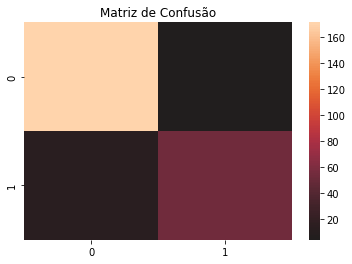

In [88]:
sns.heatmap(cm, center=True)
plt.title("Matriz de Confusão")
plt.show()

In [89]:
exemplos_treino_x = exemplos_treino[:,:2]
exemplos_treino_y = exemplos_treino[:,2]

predicao_treino = neuronio.teste(exemplos_treino_x)

true_positivo_and_true_negative = 0
for i in range(0, len(predicao_treino)):
  if predicao_treino[i] == exemplos_treino_y[i]:
    true_positivo_and_true_negative += 1

acuracia_treino = true_positivo_and_true_negative / exemplos_treino.shape[0]

print("Acurácia para os dados do conjunto de treinamento inicialmente fornecido: ", acuracia_treino)

Acurácia para os dados do conjunto de treinamento inicialmente fornecido:  0.9464285714285714


In [90]:
nome_classes = ["Classe 0", "Classe 1"]
print(metrics.classification_report(exemplos_treino_y, predicao_treino, target_names=nome_classes))

              precision    recall  f1-score   support

    Classe 0       0.95      0.99      0.97       425
    Classe 1       0.95      0.82      0.88       135

    accuracy                           0.95       560
   macro avg       0.95      0.90      0.92       560
weighted avg       0.95      0.95      0.95       560



Sabendo que *precisão* é a capacidade do classificador de não rotular como positiva uma amostra negativa, que *revocação (recall)* é a capacidade do classificador de encontrar todas as amostras positivas e que *f1-score* fornece a média harmônica ponderada de *precisão* e *revocação*. Temos que para os resultados acima obtidos:

1. Na **Classe 0**, na maioria das vezes o modelo possui taxa de precisão e revocação **acima de 90%**, acertando em torno de **90% a 99%** dos resultados (precisão) e encontrando cerca de **90% a 99%** dos valores positivos (revocação).

2. Já para a **Classe 1** o modelo tem uma taxa de acerto em torno de **90% a 95** (precisão) e é capaz de encontrar de **80% a 96%** dos valores positivos (revocação)

Pode-se concluir que os resultados encontrados são bem relevantes, porém, variam de forma significativa de acordo com a disposição das amostras utilizadas para treinamento e dos pesos iniciais do neurônio.

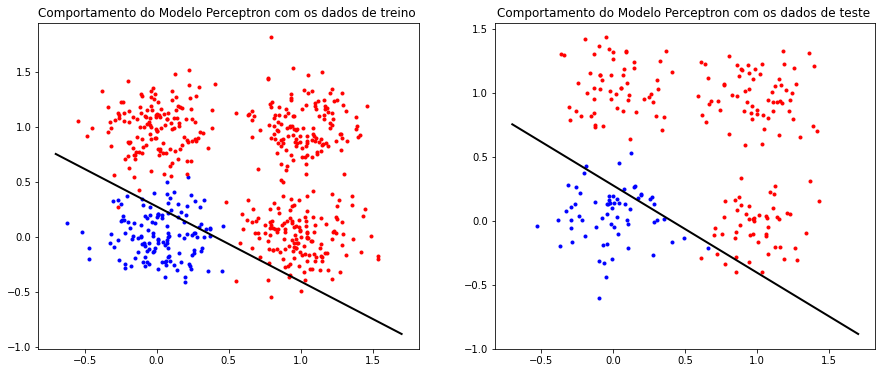

In [91]:
#calcula reta
x1 = np.array([-0.7, 1.7])
m = -neuronio.pesos[1]/neuronio.pesos[2]
c = -neuronio.pesos[0]/neuronio.pesos[2]
x2 = m*x1 + c

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,6))

for i in range(exemplos_treino.shape[0]):
    ax1.plot(exemplos_treino[i][0], exemplos_treino[i][1], 'b.' if (exemplos_treino[i][2] == 1) else 'r.')

ax1.set_title("Comportamento do Modelo Perceptron com os dados de treino ");
ax1.plot(x1, x2, 'k-',linewidth=2)

for i in range(exemplos_teste.shape[0]):
    ax2.plot(exemplos_teste[i][0], exemplos_teste[i][1], 'b.' if (exemplos_teste[i][2] == 1) else 'r.')

ax2.set_title("Comportamento do Modelo Perceptron com os dados de teste ");
ax2.plot(x1, x2, 'k-',linewidth=2)